In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])  
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [5]:
dfg = df.groupby('Store')
dfg

In [6]:
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [7]:
store_avg = store_avg.reset_index()

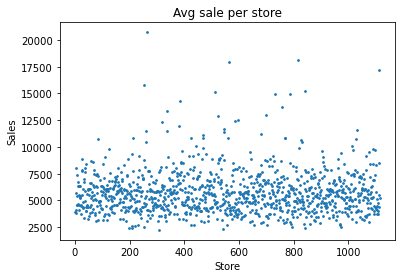

In [8]:
store_avg.plot.scatter('Store', 'Sales', s=3, title='Avg sale per store');

## Multiple Groups

In [9]:
store_day = df.groupby(['Store', 'DayOfWeek'], as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


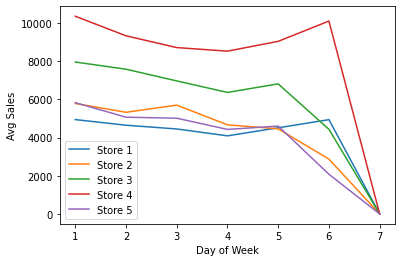

In [11]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f'Store {store}')
plt.xlabel('Day of Week')
plt.ylabel('Avg Sales')
plt.legend();

## Continuous grouping

In [13]:
df.groupby('Sales').mean().shape

(21734, 6)

In [14]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [15]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]

In [16]:
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df['SalesGroup'] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [17]:
df.groupby(['Store', 'SalesGroup']).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [18]:
df.groupby(['Store', 'SalesGroup']).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [19]:
df.groupby(['Store', 'SalesGroup', 'DayOfWeek']).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64